---
# 1조
## 각 시군구별 실제 투표율과 가장 유사한 지역 Top 5를 뽑아서 오차의 합을 막대 그래프로 그려라
### 조건1 : 각 후보별 순위 변동 없음,
### 조건 2 : 각 후보별 오차 1프로 이내,
### 조건 3 : 오차의 합이 최소인 지역 순서대로 정렬
### 실제 득표율 : 이재명 47.83, 윤석열 48.56, 심상정 2.37

In [49]:
election <- read.csv("../Data/election_2022.csv")
library(dplyr)
library(plotrix)

head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
서울특별시,종로구,129968,100629,46130,49172,3115
서울특별시,중구,111448,84998,38244,42906,2310
서울특별시,용산구,199077,152068,60063,85047,4374
서울특별시,성동구,252087,197240,84411,103880,5365
서울특별시,광진구,303582,235471,109922,113733,7072
서울특별시,동대문구,300928,232106,108171,112890,6416


In [50]:
vote <- cbind(광역시도 = election$광역시도, 시군구 = election$시군구,round(election[, 5:7] / election$투표수 * 100 ,2))

In [51]:
vote2 <- subset(vote, abs(이재명-47.83)<=1 & abs(윤석열-48.53)<=1 & abs(심상정-2.37)<=1 & 이재명<윤석열 )
vote2$오차 <- round(abs(vote2$이재명-47.83)+ abs(vote2$윤석열-48.53) + abs(vote2$심상정-2.37) , 2)
vote2 <- arrange(vote2, vote2$오차)
vote2

광역시도,시군구,이재명,윤석열,심상정,오차
대전광역시,유성구,47.05,48.19,2.81,1.56
인천광역시,미추홀구,47.08,47.81,2.74,1.84
인천광역시,동구,46.91,48.05,2.92,1.95
대전광역시,대덕구,46.90,47.80,2.72,2.01
충청북도,청주시흥덕구,47.01,47.62,2.91,2.27


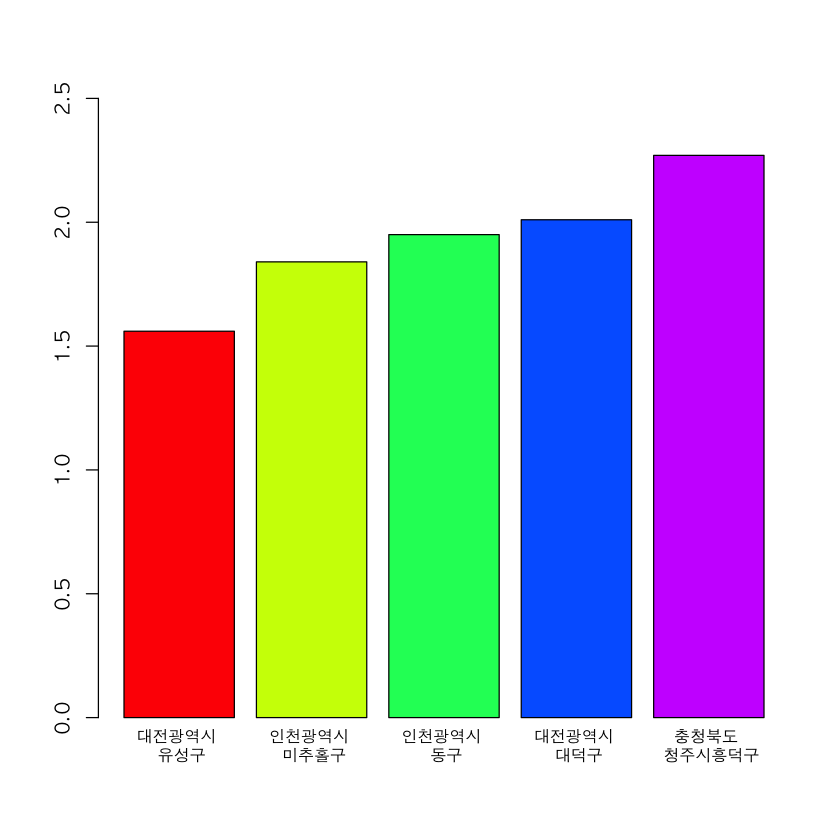

In [52]:
par(family = "AppleGothic")
options(warn = -1)
barplot(vote2$오차,
        ylim = c(0, 2.5),
        names = paste(vote2$광역시도,"\n", vote2$시군구),
        col = rainbow(5),
        cex.names = 0.8
       )

---
# 2조
## 투표율 75%가 넘는 지역에서 후보별 투표율 50%가 넘는 광역시별 합을 그래프로 그리기
## 투표율 : 전체투표수 / 선거인수
## 후보별 투표율 : 후보투표수/전체투표수

In [53]:
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
서울특별시,종로구,129968,100629,46130,49172,3115
서울특별시,중구,111448,84998,38244,42906,2310
서울특별시,용산구,199077,152068,60063,85047,4374
서울특별시,성동구,252087,197240,84411,103880,5365
서울특별시,광진구,303582,235471,109922,113733,7072
서울특별시,동대문구,300928,232106,108171,112890,6416


In [54]:
ratio <- election[, 1:2]
ratio$지역75 <- ifelse(round(election$투표수/election$선거인수 * 100, 2) >= 75, 1, 0)
ratio$이재명50 <- ifelse(round(election$이재명/election$투표수 * 100, 2) >= 50 & ratio$지역75 > 0, 1, 0)
ratio$윤석열50 <- ifelse(round(election$윤석열/election$투표수 * 100, 2) >= 50 & ratio$지역75 > 0, 1, 0)

In [55]:
r2 <- t(aggregate(cbind(지역75, 이재명50, 윤석열50) ~ 광역시도, ratio, sum))

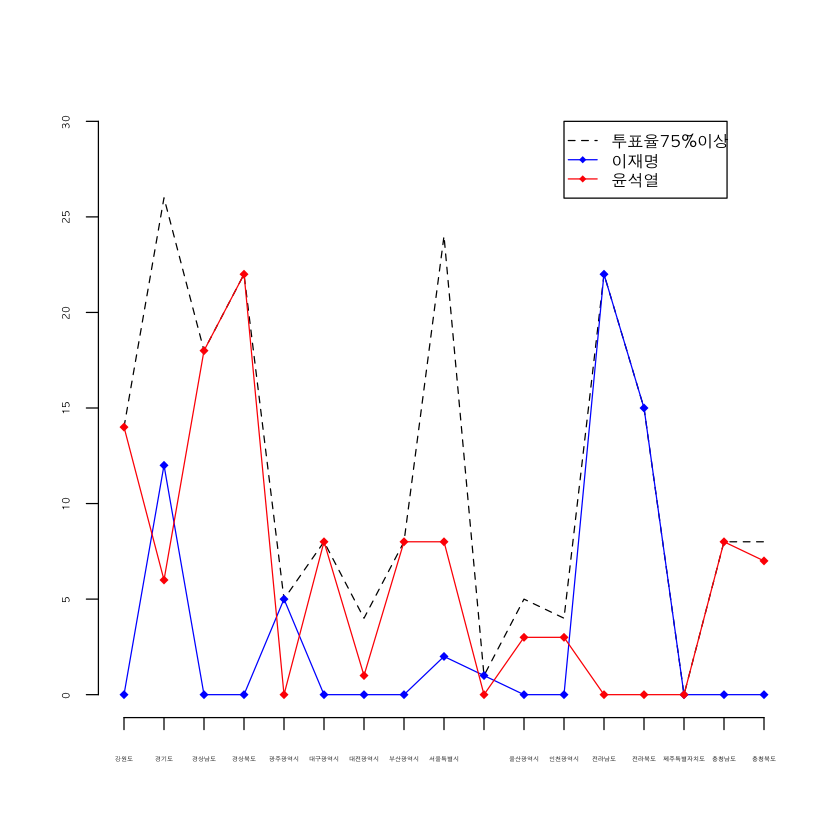

In [56]:
par(family = "AppleGothic")
plot(r2[2,],
     main='광역시도 별 과반수 득표가 나온 시군구 갯수',
    type='l',
    ylab='시군구수',
    xlab='광역시도',
    cex.axis = 0.1,
    ylim=c(0,30),
    lty = 2,
    axes =F, #x,y 좌표 frame 제거
    ann=F, #x,y label 제거
    )

axis(1,at=1:17, lab=r2[1,], cex.axis=0.3)
axis(2, cex.axis=0.5)

lines(
    r2[3,],
    col='blue',
    type='o',
    pch=18,
    lty=1,
)
lines(
    r2[4,],
    col='red',
    type='o',
    pch=18,
    lty=1,
)
legend(12,30, 
      c("투표율75%이상","이재명","윤석열"),
      col=c("black","blue","red"),
      pch=c(NA,18,18),
      lty=c(2,1,1),
      cex=0.8 
    )



---
# 3조 권역별 후보 득표율

In [41]:
수도권 <-c('서울특별시','인천광역시','경기도')
강원권 <-'강원도'
영남권 <- c('경상북도','경상남도','대구광역시','부산광역시','울산광역시')
충청권 <- c('충청북도','충청남도','세종특별자치시','대전광역시')
호남권 <- c('전라남도','전라북도','제주특별자치도','광주광역시')

In [42]:
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
서울특별시,종로구,129968,100629,46130,49172,3115
서울특별시,중구,111448,84998,38244,42906,2310
서울특별시,용산구,199077,152068,60063,85047,4374
서울특별시,성동구,252087,197240,84411,103880,5365
서울특별시,광진구,303582,235471,109922,113733,7072
서울특별시,동대문구,300928,232106,108171,112890,6416


In [43]:
election$지역 <- ifelse(election$광역시도 %in% 수도권, '수도권', 
                  ifelse(election$광역시도 %in% 영남권, '영남권', 
                    ifelse(election$광역시도 %in% 충청권, '충청권', 
                      ifelse(election$광역시도 %in% 호남권, '호남권', '강원도'))))

In [44]:
elc2 <- aggregate(cbind(투표수, 이재명, 윤석열, 심상정) ~ 지역, election, sum)

In [45]:
elc2$이재명투표율 <- round(elc2$이재명/elc2$투표수 * 100, 2)
elc2$윤석열투표율 <- round(elc2$윤석열/elc2$투표수 * 100, 2)
elc2$심상정투표율 <- round(elc2$심상정/elc2$투표수 * 100, 2)

In [46]:
elc2

지역,투표수,이재명,윤석열,심상정,이재명투표율,윤석열투표율,심상정투표율
강원도,1015458,419644,544980,25031,41.33,53.67,2.46
수도권,16904189,8156232,7993973,433289,48.25,47.29,2.56
영남권,8468363,2686576,5382549,185678,31.72,63.56,2.19
충청권,3464133,1573443,1719055,89261,45.42,49.62,2.58
호남권,3912521,3154923,619883,64193,80.64,15.84,1.64


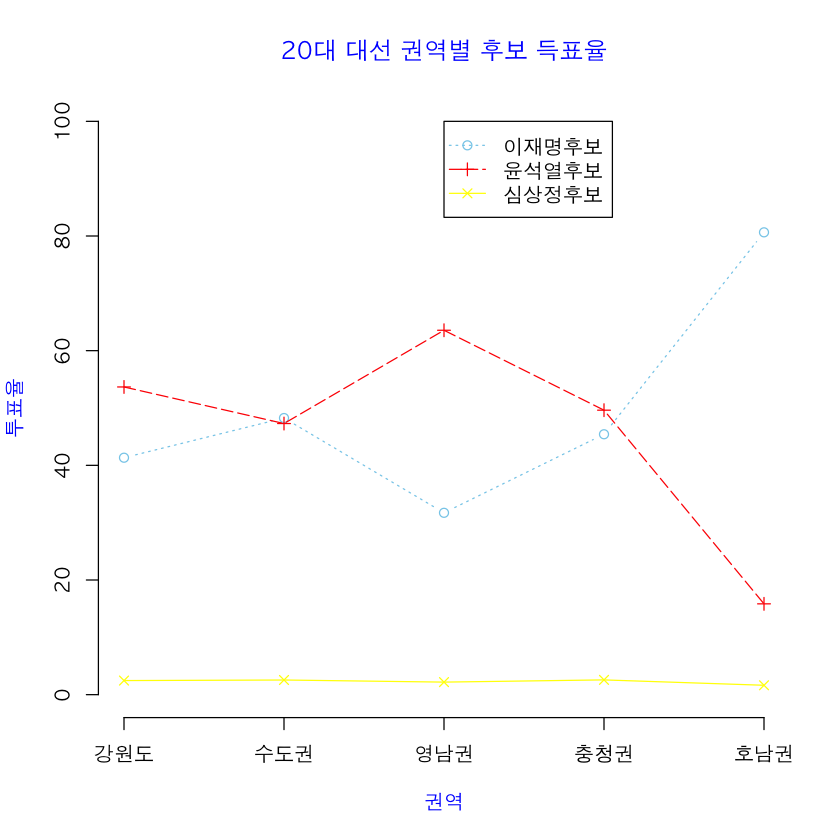

In [47]:
options(scipen = 100)
par(family = "AppleGothic")
plot(elc2$이재명투표율,
     type ="b",
     ylim=c(0,100),
     axes=F,
     ann=F,
     col="sky blue",
     lty=3
    )
legend(3,100,
      c("이재명후보","윤석열후보","심상정후보"),
      col=c("sky blue","red","yellow"),
      pch=c(21,3,4),
      lty=c(3,5,1)
      )
title(main="20대 대선 권역별 후보 득표율", col.main="blue")
title(xlab="권역", col.lab="blue")
title(ylab="투표율", col.lab="blue")
axis(1,at=1:5,lab=elc2[,1])
axis(2,ylim=c(0,100))
lines(elc2$윤석열투표율,
      type="o",
      pch=3,
      col="red",
      lty=5
     )
lines(elc2$심상정투표율,
      type="o",
      pch=4,
      col="yellow",
      lty=1
     )

---
# 4조 투표율 최고, 최저 지역의 득표율

In [36]:
election <- read.csv("../Data/election_2022.csv")
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
서울특별시,종로구,129968,100629,46130,49172,3115
서울특별시,중구,111448,84998,38244,42906,2310
서울특별시,용산구,199077,152068,60063,85047,4374
서울특별시,성동구,252087,197240,84411,103880,5365
서울특별시,광진구,303582,235471,109922,113733,7072
서울특별시,동대문구,300928,232106,108171,112890,6416


In [37]:
t4 <- aggregate(cbind(선거인수, 투표수, 이재명, 윤석열, 심상정) ~ 광역시도, election, sum)
t4$기타 <- t4$투표수 - apply(t4[,4:6], 1, sum)
t4$투표율 <- round(t4$투표수/t4$선거인수 * 100, 2)
t4 <- arrange(t4, desc(t4$투표율))
result <- t4[c(1, nrow(t4)),]
r2 <- round(result[,4:7]/result$투표수 * 100, 2)
rownames(r2) <- paste(c("최고", "최저"), ":", result[,1])

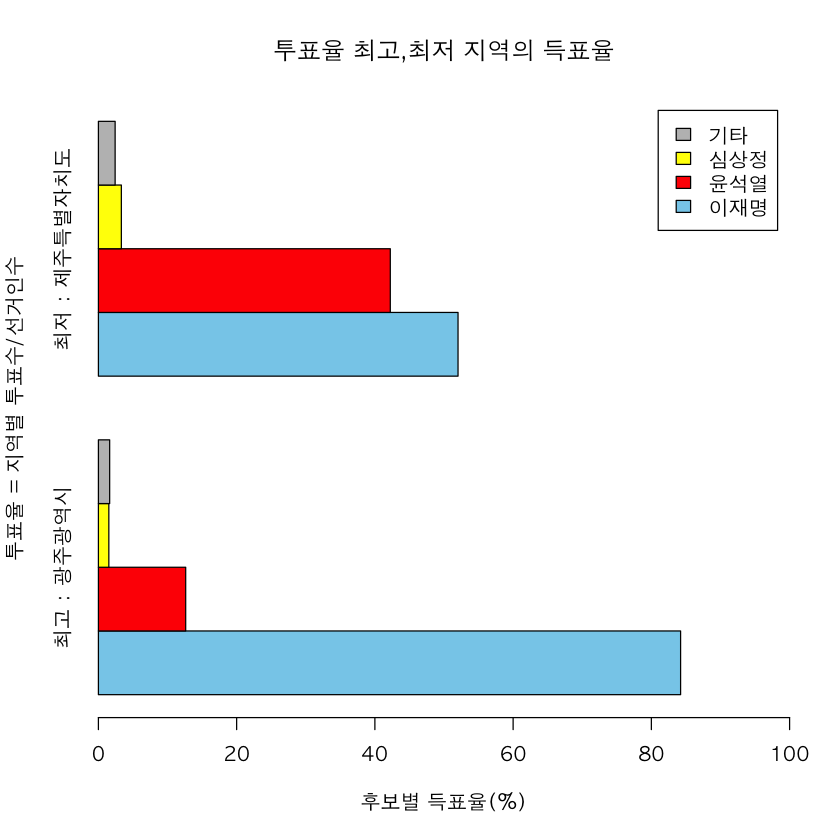

In [39]:
par(family = "AppleGothic")
barplot(t(r2),
         beside=T,
         xlab="후보별 득표율(%)",
         xlim=c(0,100),
         col=c('skyblue','red','yellow','gray'),
         main = "투표율 최고,최저 지역의 득표율",
         ylab = "투표율 = 지역별 투표수/선거인수",
         legend.text=T,
         horiz=T
        )